<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multiple_Time_Series_Forecasting_using_DeepAR_Gluon_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install --upgrade mxnet-cu101==1.6.0.post0
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip
!unzip LD2011_2014.txt.zip

In [ ]:
!head LD2011_2014.txt

"";"MT_001";"MT_002";"MT_003";"MT_004";"MT_005";"MT_006";"MT_007";"MT_008";"MT_009";"MT_010";"MT_011";"MT_012";"MT_013";"MT_014";"MT_015";"MT_016";"MT_017";"MT_018";"MT_019";"MT_020";"MT_021";"MT_022";"MT_023";"MT_024";"MT_025";"MT_026";"MT_027";"MT_028";"MT_029";"MT_030";"MT_031";"MT_032";"MT_033";"MT_034";"MT_035";"MT_036";"MT_037";"MT_038";"MT_039";"MT_040";"MT_041";"MT_042";"MT_043";"MT_044";"MT_045";"MT_046";"MT_047";"MT_048";"MT_049";"MT_050";"MT_051";"MT_052";"MT_053";"MT_054";"MT_055";"MT_056";"MT_057";"MT_058";"MT_059";"MT_060";"MT_061";"MT_062";"MT_063";"MT_064";"MT_065";"MT_066";"MT_067";"MT_068";"MT_069";"MT_070";"MT_071";"MT_072";"MT_073";"MT_074";"MT_075";"MT_076";"MT_077";"MT_078";"MT_079";"MT_080";"MT_081";"MT_082";"MT_083";"MT_084";"MT_085";"MT_086";"MT_087";"MT_088";"MT_089";"MT_090";"MT_091";"MT_092";"MT_093";"MT_094";"MT_095";"MT_096";"MT_097";"MT_098";"MT_099";"MT_100";"MT_101";"MT_102";"MT_103";"MT_104";"MT_105";"MT_106";"MT_107";"MT_108";"MT_109";"MT_110";"MT_111

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df=pd.read_csv('LD2011_2014.txt', sep=';', index_col=0, parse_dates=True, decimal=',')

In [ ]:
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,...,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,129.629630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,119.212963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,127.314815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,122.685185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
df.columns

Index(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007',
       'MT_008', 'MT_009', 'MT_010',
       ...
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366', 'MT_367',
       'MT_368', 'MT_369', 'MT_370'],
      dtype='object', length=370)

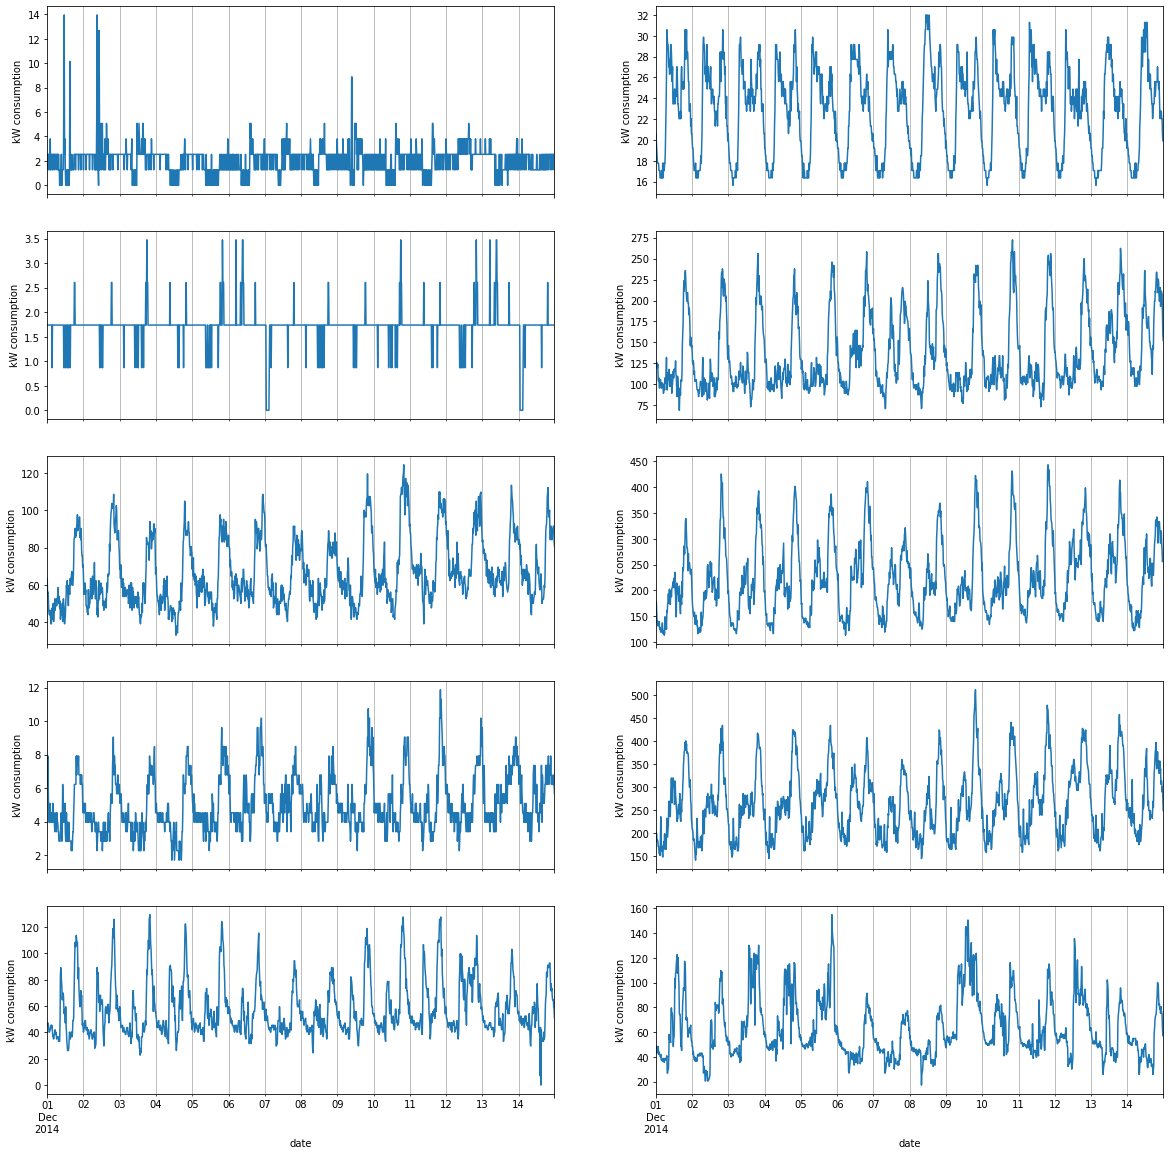

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 10):
    df[df.columns[i]].loc["2014-12-01":"2014-12-14"].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("kW consumption")   
    axx[i].grid(which='minor', axis='x')

In [ ]:
df_input=df.reset_index(drop=True).T.reset_index()

In [ ]:
df_input

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,140216,140217,140218,140219,140220,140221,140222,140223,140224,140225,140226,140227,140228,140229,140230,140231,140232,140233,140234,140235,140236,140237,140238,140239,140240,140241,140242,140243,140244,140245,140246,140247,140248,140249,140250,140251,140252,140253,140254,140255
0,MT_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.269036,1.269036,1.269036,2.538071,3.807107,6.345178,2.538071,2.538071,2.538071,3.807107,2.538071,2.538071,2.538071,1.269036,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071,3.807107,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071
1,MT_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.027027,25.604552,27.027027,26.315789,29.160740,29.160740,29.871977,29.160740,29.160740,28.449502,28.449502,29.871977,29.160740,26.315789,27.738265,27.738265,29.160740,28.449502,29.160740,29.160740,28.449502,28.449502,27.027027,26.315789,25.604552,25.604552,23.470839,22.759602,23.470839,22.759602,22.048364,22.048364,22.048364,22.048364,22.048364,22.048364,21.337127,20.625889,21.337127,19.914651
2,MT_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.737619,0.868810,1.737619,1.737619,1.737619,1.737619,0.868810,1.737619,1.737619,1.737619,1.737619,1.737619,2.606429,1.737619,2.606429,3.475239,2.606429,2.606429,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619
3,MT_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.113821,128.048780,146.341463,144.308943,146.341463,144.308943,126.016260,140.243902,152.439024,162.601626,162.601626,164.634146,152.439024,160.569106,189.024390,205.284553,199.186992,205.284553,217.479675,215.447154,227.642276,205.284553,193.089431,195.121951,193.089431,189.024390,168.699187,162.601626,168.699187,160.569106,156.504065,164.634146,160.569106,162.601626,156.504065,150.406504,166.666667,162.601626,166.666667,178.861789
4,MT_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.170732,69.512195,57.317073,59.756098,60.975610,60.975610,62.195122,54.878049,63.414634,71.951220,75.609756,68.292683,63.414634,65.853659,74.390244,85.365854,87.804878,86.585366,89.024390,92.682927,102.439024,95.121951,91.463415,96.341463,91.463415,90.243902,90.243902,87.804878,87.804878,82.926829,86.585366,93.902439,87.804878,80.487805,85.365854,85.365854,81.707317,82.926829,85.365854,84.146341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MT_366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.510825,3.510825,3.510825,3.510825,7.606788,3.510825,3.510825,4.681100,4.681100,7.606788,7.606788,8.777063,9.362200,9.362200,9.947338,9.947338,6.436513,4.095963,3.510825,4.095963,4.095963,3.510825,6.436513,5.851375,4.095963,4.095963,3.510825,4.681100,3.510825,4.095963,3.510825,6.436513,11.702750

In [ ]:
ts_code=df_input["index"].astype('category').cat.codes.values

In [ ]:
ts_code

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
df_input

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,140216,140217,140218,140219,140220,140221,140222,140223,140224,140225,140226,140227,140228,140229,140230,140231,140232,140233,140234,140235,140236,140237,140238,140239,140240,140241,140242,140243,140244,140245,140246,140247,140248,140249,140250,140251,140252,140253,140254,140255
0,MT_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.269036,1.269036,1.269036,2.538071,3.807107,6.345178,2.538071,2.538071,2.538071,3.807107,2.538071,2.538071,2.538071,1.269036,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071,3.807107,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071
1,MT_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.027027,25.604552,27.027027,26.315789,29.160740,29.160740,29.871977,29.160740,29.160740,28.449502,28.449502,29.871977,29.160740,26.315789,27.738265,27.738265,29.160740,28.449502,29.160740,29.160740,28.449502,28.449502,27.027027,26.315789,25.604552,25.604552,23.470839,22.759602,23.470839,22.759602,22.048364,22.048364,22.048364,22.048364,22.048364,22.048364,21.337127,20.625889,21.337127,19.914651
2,MT_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.737619,0.868810,1.737619,1.737619,1.737619,1.737619,0.868810,1.737619,1.737619,1.737619,1.737619,1.737619,2.606429,1.737619,2.606429,3.475239,2.606429,2.606429,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619
3,MT_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.113821,128.048780,146.341463,144.308943,146.341463,144.308943,126.016260,140.243902,152.439024,162.601626,162.601626,164.634146,152.439024,160.569106,189.024390,205.284553,199.186992,205.284553,217.479675,215.447154,227.642276,205.284553,193.089431,195.121951,193.089431,189.024390,168.699187,162.601626,168.699187,160.569106,156.504065,164.634146,160.569106,162.601626,156.504065,150.406504,166.666667,162.601626,166.666667,178.861789
4,MT_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.170732,69.512195,57.317073,59.756098,60.975610,60.975610,62.195122,54.878049,63.414634,71.951220,75.609756,68.292683,63.414634,65.853659,74.390244,85.365854,87.804878,86.585366,89.024390,92.682927,102.439024,95.121951,91.463415,96.341463,91.463415,90.243902,90.243902,87.804878,87.804878,82.926829,86.585366,93.902439,87.804878,80.487805,85.365854,85.365854,81.707317,82.926829,85.365854,84.146341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MT_366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.510825,3.510825,3.510825,3.510825,7.606788,3.510825,3.510825,4.681100,4.681100,7.606788,7.606788,8.777063,9.362200,9.362200,9.947338,9.947338,6.436513,4.095963,3.510825,4.095963,4.095963,3.510825,6.436513,5.851375,4.095963,4.095963,3.510825,4.681100,3.510825,4.095963,3.510825,6.436513,11.702750

In [ ]:
df_train=df_input.iloc[:,1:134999].values
df_test=df_input.iloc[:,134999:].values

In [ ]:
df_train.shape

(370, 134998)

In [ ]:
df_test.shape

(370, 5258)

In [ ]:
freq="15min"
start_train = pd.Timestamp("2011-01-01 00:15:00", freq=freq)
start_test = pd.Timestamp("2014-11-07 05:30:00", freq=freq)
prediction_lentgh=672

In [ ]:
estimator = DeepAREstimator(freq=freq, 
                            context_length=672,
                            prediction_length=prediction_lentgh,
                            use_feat_static_cat=True,
                            cardinality=[1],
                            num_layers=2,
                            num_cells=32,
                            cell_type='lstm',
                            trainer=Trainer(epochs=5))

In [ ]:
df_train[0:7]

array([[  0.        ,   0.        ,   0.        , ...,   2.53807107,
          2.53807107,   1.26903553],
       [  0.        ,   0.        ,   0.        , ...,  17.06970128,
         17.78093883,  17.78093883],
       [  0.        ,   0.        ,   0.        , ...,   1.73761946,
          1.73761946,   1.73761946],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  47.56097561,
         43.90243902,  43.90243902],
       [  0.        ,   0.        ,   0.        , ..., 107.14285714,
        116.07142857,  98.21428571],
       [  0.        ,   0.        ,   0.        , ...,   4.522329  ,
          4.522329  ,   3.95703787]])

In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

train_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_train,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_train[0:7],
                             ts_code[0:7].reshape(-1,1))
], freq=freq)

test_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_test,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_test[0:7],
                            ts_code[0:7].reshape(-1,1))
], freq=freq)

In [ ]:
next(iter(train_ds))

{'feat_static_cat': array([0], dtype=int32),
 'source': SourceContext(source='list_data', row=0),
 'start': Timestamp('2011-01-01 00:15:00', freq='15T'),
 'target': array([0.       , 0.       , 0.       , ..., 2.5380712, 2.5380712,
        1.2690356], dtype=float32)}

In [ ]:
predictor = estimator.train(training_data=train_ds)

  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [02:10<00:00,  2.61s/it, epoch=5/5, avg_epoch_loss=2.3] 


In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  
    predictor=predictor,  
    num_samples=100, 
)

In [ ]:
from tqdm.autonotebook import tqdm

print("Obtaining time series conditioning values ...")
tss = list(tqdm(ts_it, total=len(df_test)))
print("Obtaining time series predictions ...")
forecasts = list(tqdm(forecast_it, total=len(df_test)))

Obtaining time series conditioning values ...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """Entry point for launching an IPython kernel.



Obtaining time series predictions ...


In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_lentgh
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

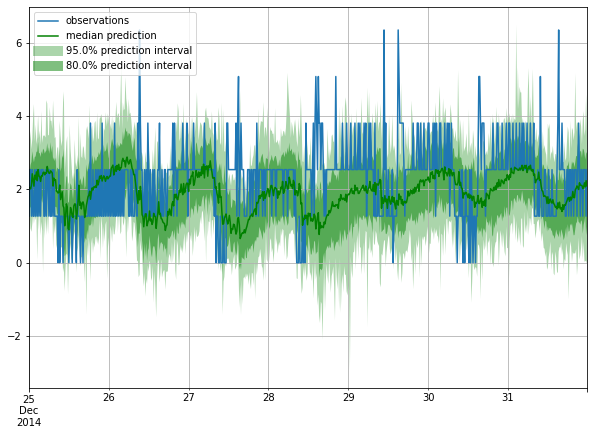

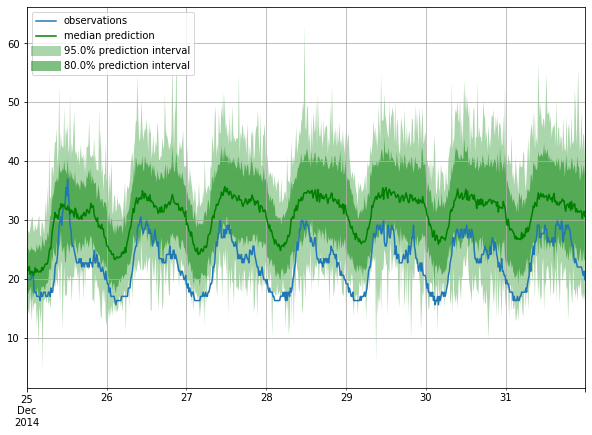

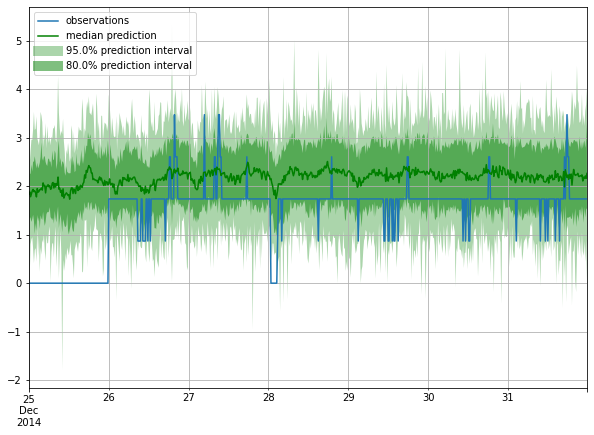

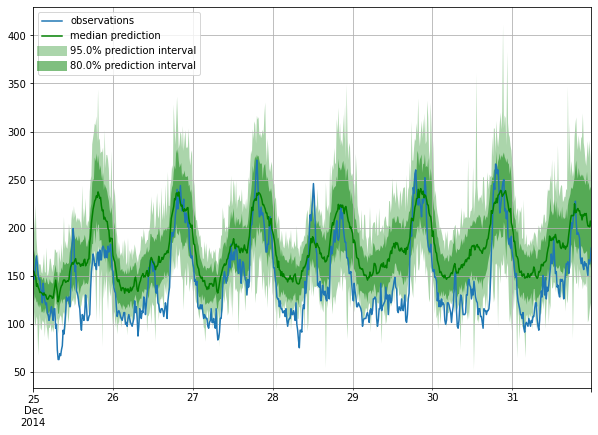

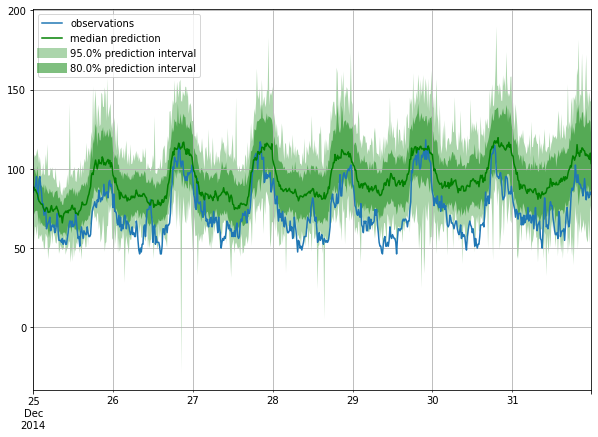

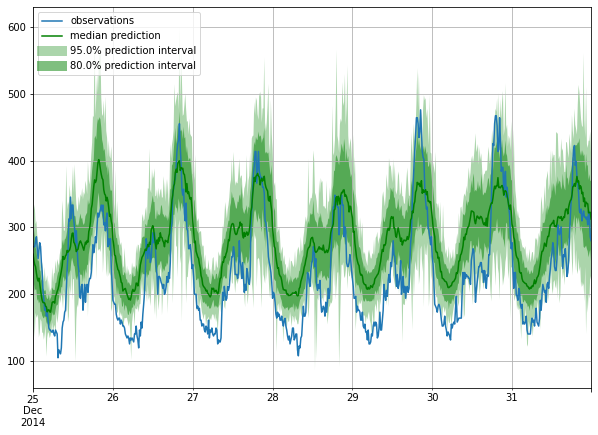

In [ ]:
for i in tqdm(range(6)):
    ts_entry = tss[i]
    forecast_entry = forecasts[i]
    plot_prob_forecasts(ts_entry, forecast_entry)

In [ ]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(df_test[0:7]))

Running evaluation: 100%|██████████| 7/7 [00:00<00:00, 112.98it/s]WARNING:root:multiple 15 does not divide base seasonality 1.Falling back to seasonality 1



In [ ]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,1.348657,583.443542,1513.959351,2.252916,0.839750,1.033902,0.335097,0.458296,NaN,9.609799,257.903414,0.142857,583.443567,0.349702,387.718187,0.723214
1,NaN,69.460310,5409.424805,15320.056641,22.797703,0.811912,9.914543,0.376885,0.309807,NaN,43.683063,2967.513499,0.748512,5409.425049,0.989583,1867.274367,1.000000
2,NaN,0.860607,505.152161,984.361450,1.464824,0.114831,6.546286,0.285373,0.539814,NaN,63.957976,317.988738,0.221726,505.152155,0.962798,186.208562,0.992560
3,NaN,1432.087891,22680.880859,98455.281250,146.510835,8.946636,3.772514,0.269242,0.227286,NaN,27.103397,15665.920729,0.613095,22680.880142,0.904762,8003.490598,0.982143
4,NaN,458.206148,13023.876953,49303.656250,73.368536,4.198207,4.616439,0.294029,0.246302,NaN,27.008531,7653.017758,0.644345,13023.876530,0.962798,4700.654267,0.997024
5,NaN,4070.659598,39044.195312,157196.437500,233.923270,13.675547,4.248567,0.296907,0.250064,NaN,35.882744,31333.222577,0.677083,39044.192596,0.857143,13378.340776,0.950893
6,NaN,4.183201,1178.468018,3665.913086,5.455228,0.594141,2.951609,0.390869,0.311783,NaN,17.695337,525.325295,0.401786,1178.467977,0.797619,564.565192,0.904762


In [ ]:
feat_add=pd.DataFrame(df_input[['T_out']][:train_time].values).apply(lambda x: np.asarray(x), axis=1).tolist()

In [ ]:
feat_add